In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
# from feature_engine import missing_data_imputers as mdi
# discretisers as dsc, categorical_encoders as ce

In [4]:
cols = [
    "pclass", "sex", "age", "sibsp", "parch", "fare", "cabin", "embarked", "survived"
]

data = pd.read_csv("titanic.csv", usecols=cols)

data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [5]:
data.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
cabin        object
embarked     object
dtype: object

In [7]:
for var in data.columns:
    print(var, data[var].unique()[0:20], "\n")

pclass [1 2 3] 

survived [1 0] 

sex ['female' 'male'] 

age [29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.         nan 50.     32.
 36.     37.    ] 

sibsp [0 1 2 3 4 5 8] 

parch [0 2 1 4 3 5 6 9] 

fare [211.3375 151.55    26.55    77.9583   0.      51.4792  49.5042 227.525
  69.3     78.85    30.      25.925  247.5208  76.2917  75.2417  52.5542
 221.7792  26.      91.0792 135.6333] 

cabin ['B5' 'C22' 'E12' 'D7' 'A36' 'C101' nan 'C62' 'B35' 'A23' 'B58' 'D15' 'C6'
 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T'] 

embarked ['S' 'C' nan 'Q'] 



In [8]:
discrete = [var for var in data.columns if data[var].dtype != "O" and var != "survived" and data[var].nunique() < 10]
continuous = [var for var in data.columns if data[var].dtype != "O" and var != "survived" and var not in discrete]

mixed = ["cabin"]

categorical = [var for var in data.columns if data[var].dtype == "O" and var not in mixed]

print(f"There are {len(discrete)} discrete variables")
print(f"There are {len(continuous)} discrete variables")
print(f"There are {len(categorical)} discrete variables")
print(f"There are {len(mixed)} discrete variables")

There are 3 discrete variables
There are 2 discrete variables
There are 2 discrete variables
There are 1 discrete variables


In [9]:
# Percentage of missing data

data.isnull().mean()

pclass      0.000000
survived    0.000000
sex         0.000000
age         0.200917
sibsp       0.000000
parch       0.000000
fare        0.000764
cabin       0.774637
embarked    0.001528
dtype: float64

In [11]:
# Cardinality   

data[categorical+mixed].nunique()

sex           2
embarked      3
cabin       181
dtype: int64

<Axes: >

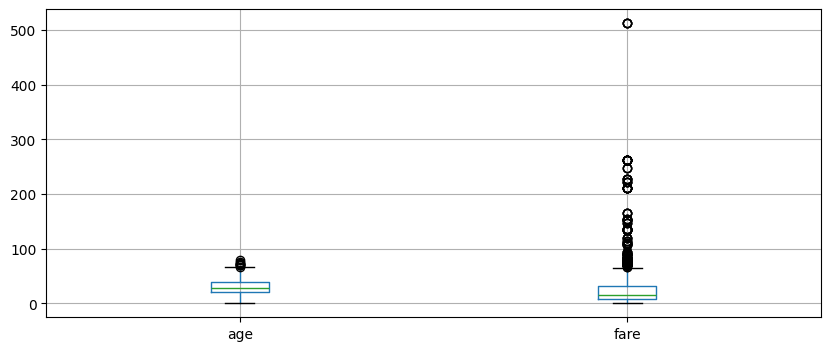

In [12]:
# Outliers

data[continuous].boxplot(figsize=(10, 4))

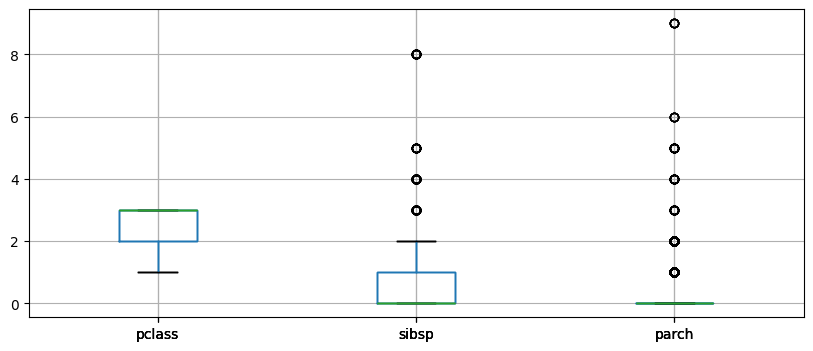

In [15]:
data[discrete].boxplot(figsize=(10, 4))
plt.show()

In [16]:
# Values bigger than 3 are rare from parch

data["parch"].value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [17]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
data["cabin_num"] = data["cabin"].str.extract("(\d+)")
data["cabin_num"] = data["cabin_num"].astype("float")
data["cabin_cat"] = data["cabin"].str[0]

data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,cabin_num,cabin_cat
0,1,1,female,29.0000,0,0,211.3375,B5,S,5.0,B
1,1,1,male,0.9167,1,2,151.5500,C22,S,22.0,C
2,1,0,female,2.0000,1,2,151.5500,C22,S,22.0,C
3,1,0,male,30.0000,1,2,151.5500,C22,S,22.0,C
4,1,0,female,25.0000,1,2,151.5500,C22,S,22.0,C


In [19]:
data.drop(["cabin"], axis=1, inplace=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("survived", axis=1),
    data["survived"],
    test_size=0.1,
    random_state=0
)

X_train.shape, X_test.shape

((1178, 9), (131, 9))

In [21]:
# Numerical

X_train.select_dtypes(exclude="O").isnull().mean()

pclass       0.000000
age          0.198642
sibsp        0.000000
parch        0.000000
fare         0.000849
cabin_num    0.782683
dtype: float64

In [23]:
# Categorical

X_train.select_dtypes(include="O").isnull().mean()

sex          0.000000
embarked     0.001698
cabin_cat    0.771647
dtype: float64

In [24]:
X_train[["cabin_cat", "sex", "embarked"]].nunique()

cabin_cat    8
sex          2
embarked     3
dtype: int64

In [25]:
# Check variable frequency

var = "cabin_cat"
(X_train[var].value_counts() / len(X_train)).sort_values()

cabin_cat
T    0.000849
G    0.003396
A    0.016978
F    0.016978
E    0.033107
D    0.033956
B    0.049236
C    0.073854
Name: count, dtype: float64

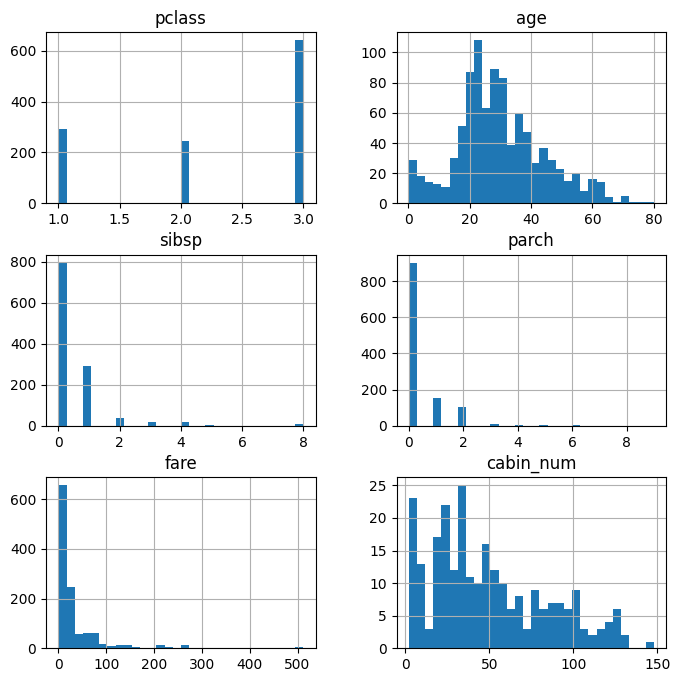

In [27]:
# Numerical values distribution

X_train.select_dtypes(exclude="O").hist(bins=30, figsize=(8, 8))
plt.show()

In [28]:
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder

titanic_pipe = Pipeline([

    # Missing data imputation
    ("imputer_num",
     ArbitraryNumberImputer(arbitrary_number=-1,
                            variables=["age", "fare", "cabin_num"])),
    ("imputer_cat",
     CategoricalImputer(variables=["embarked", "cabin_cat"])),

    # Categorical encoding
    ("encoder_rare_label",
     RareLabelEncoder(tol=0.01,
                      n_categories=6,
                      variables=["cabin_cat"])),
    ("categorical_encoder",
     OrdinalEncoder(encoding_method="ordered",
                    variables=["cabin_cat", "sex", "embarked"])),

    # Gradiend boosting model
    ("gbm", GradientBoostingClassifier(random_state=0))
])

In [29]:
titanic_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer_num',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['age', 'fare',
                                                   'cabin_num'])),
                ('imputer_cat',
                 CategoricalImputer(variables=['embarked', 'cabin_cat'])),
                ('encoder_rare_label',
                 RareLabelEncoder(n_categories=6, tol=0.01,
                                  variables=['cabin_cat'])),
                ('categorical_encoder',
                 OrdinalEncoder(variables=['cabin_cat', 'sex', 'embarked'])),
                ('gbm', GradientBoostingClassifier(random_state=0))])

In [30]:
X_train_preds = titanic_pipe.predict_proba(X_train)[:, 1]
X_test_preds = titanic_pipe.predict_proba(X_test)[:, 1]

X_train_preds

array([0.27876558, 0.08146821, 0.46816053, ..., 0.70745459, 0.90809699,
       0.4980871 ])

In [31]:
print("Train set")
print(f"GBM roc-auc: {roc_auc_score(y_train, X_train_preds)}")

print("Test set")
print(f"GBM roc-auc: {roc_auc_score(y_test, X_test_preds)}")

Train set
GBM roc-auc: 0.9269576293912577
Test set
GBM roc-auc: 0.8396084337349397


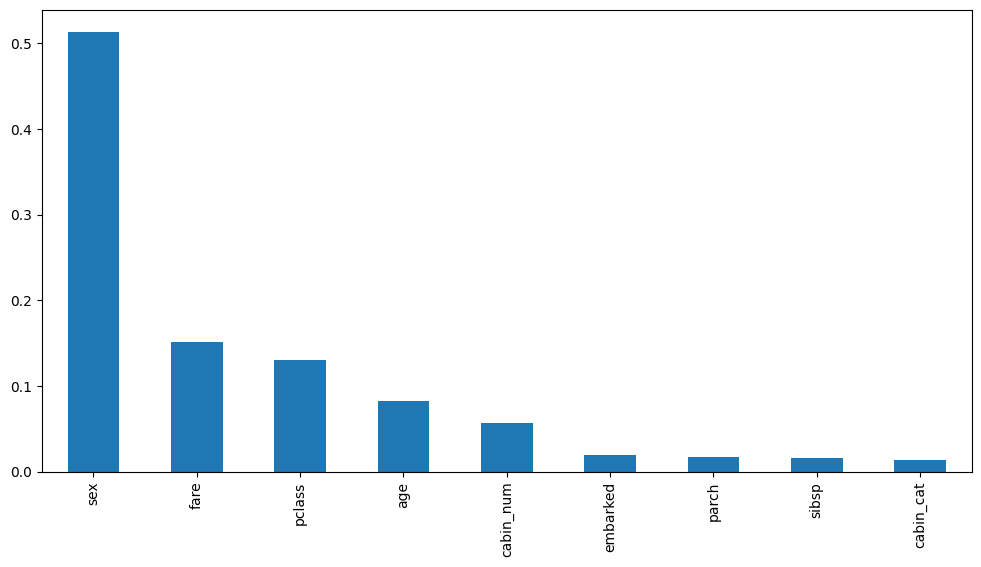

In [33]:
importance = pd.Series(titanic_pipe.named_steps["gbm"].feature_importances_)
importance.index = data.drop("survived", axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12, 6))
plt.show()